In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt

In [5]:
years=[1991,2020]
basepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/combined/'
savepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/OISST/'
fout=savepath+f'oisst-avhrr-v02r01.regridded1x1.monthly.{years[0]}_{years[-1]}.nc'

In [6]:
#get all files
flistD=[]
flistM=[]
for iy in range(years[0],years[1]+1):
    for im in range(1,13):
        fD=f'{basepath}oisst-avhrr-v02r01.{iy}{im:02}_daily.nc'
        fM=f'{basepath}oisst-avhrr-v02r01.{iy}{im:02}_monthly.nc'
        flistD.append(fD)
        flistM.append(fM)

In [10]:
fM=xr.open_mfdataset(flistM,parallel=True,decode_times=False)
fM

<xarray.Dataset> Size: 6GB
Dimensions:  (time: 360, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time     (time) float64 3kB 4.763e+03 4.792e+03 ... 1.566e+04 1.569e+04
  * zlev     (zlev) float32 4B 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
Attributes: (12/38)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.19910101.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    ...                         ...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    Conventions:                CF-1.6, ACDD-1.3
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    NCO:                        netCDF Operators version 5.0.5 (Homepage = ht...

In [12]:
fM.time

<xarray.DataArray 'time' (time: 360)> Size: 3kB
array([ 4763. ,  4792.5,  4822. , ..., 15629. , 15659.5, 15690. ])
Coordinates:
  * time     (time) float64 3kB 4.763e+03 4.792e+03 ... 1.566e+04 1.569e+04
Attributes:
    long_name:     Center time of the day
    units:         days since 1978-01-01 12:00:00
    cell_methods:  time: mean

In [31]:
fanom=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/OISST/sst_anomaly_detrended_oisst-avhrr-v02r01.regridded1x1.monthly.1991_2020.nc')

In [33]:
fanom

<xarray.Dataset> Size: 188MB
Dimensions:    (X: 360, Y: 181, S: 360)
Coordinates:
  * X          (X) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y          (Y) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * S          (S) float32 1kB 372.0 373.0 374.0 375.0 ... 729.0 730.0 731.0
Data variables:
    lon        (X) float32 1kB ...
    lat        (Y) float32 724B ...
    time       (S) float32 1kB ...
    year       (S) int64 3kB ...
    month      (S) int64 3kB ...
    sst_an_dt  (S, Y, X) float64 188MB ...

In [38]:
fsstmod=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/sst_HC_l0_1991_2020.nc')
fsstmod

<xarray.Dataset> Size: 4GB
Dimensions:     (S: 360, M: 40, Y: 180, X: 360, lon: 360, lat: 180)
Coordinates:
  * lon         (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * M           (M) int64 320B 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * S           (S) int64 3kB 252 253 254 255 256 257 ... 607 608 609 610 611
Dimensions without coordinates: Y, X
Data variables:
    start_time  (S) int64 3kB ...
    sst         (S, M, Y, X) float32 4GB ...

In [40]:
fsstmod.X

<xarray.DataArray 'X' (X: 360)> Size: 3kB
array([  0,   1,   2, ..., 357, 358, 359])
Dimensions without coordinates: X

In [41]:
fsstmod.Y

<xarray.DataArray 'Y' (Y: 180)> Size: 1kB
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])
Dimensions without coordinates: Y

In [45]:
fanommod=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/sstAnom_detr_HCC5_l0_1991_2020.nc')
fanommod

<xarray.Dataset> Size: 4GB
Dimensions:     (S: 360, M: 20, Y: 180, X: 360, lon: 360, lat: 180)
Coordinates:
  * S           (S) int64 3kB 252 253 254 255 256 257 ... 607 608 609 610 611
  * lon         (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * M           (M) int64 160B 21 22 23 24 25 26 27 28 ... 34 35 36 37 38 39 40
Dimensions without coordinates: Y, X
Data variables:
    start_time  (S) int64 3kB ...
    anom        (S, M, Y, X) float64 4GB ...

In [15]:
otime=np.array([dt.datetime(1978,1,1,12)+dt.timedelta(days=ii) for ii in fM.time.data])

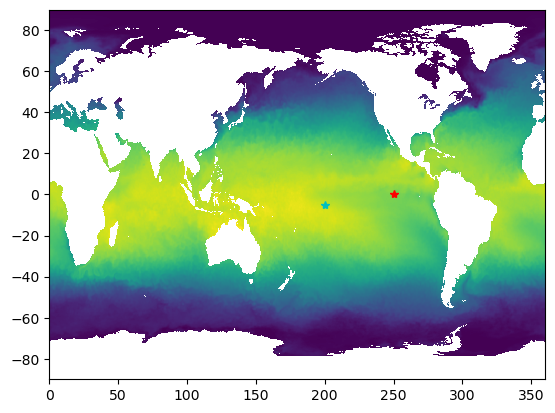

In [27]:
plt.pcolormesh(fM.lon,fM.lat,fM.sst[0,0,:,:],shading='auto')
plt.plot(250,0,'r*')
plt.plot(200,-5,'c*')

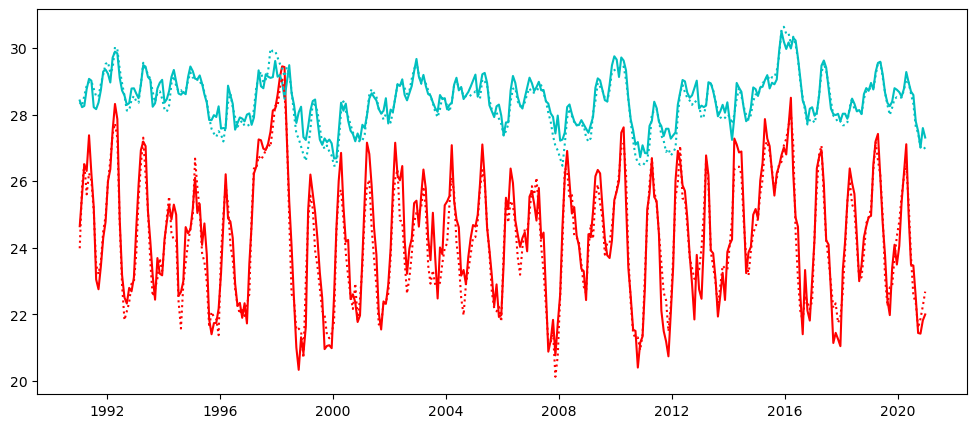

In [44]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(otime,fM.sst.isel(zlev=0).sel(lat=0,lon=250,method='nearest'),'r-')
ax.plot(otime,fM.sst.isel(zlev=0).sel(lat=-5,lon=200,method='nearest'),'c-')
ax.plot(otime,fsstmod.sst.isel(Y=85,X=200).mean(dim='M')-273.15,'c:')
ax.plot(otime,fsstmod.sst.isel(Y=90,X=250).mean(dim='M')-273.15,'r:')

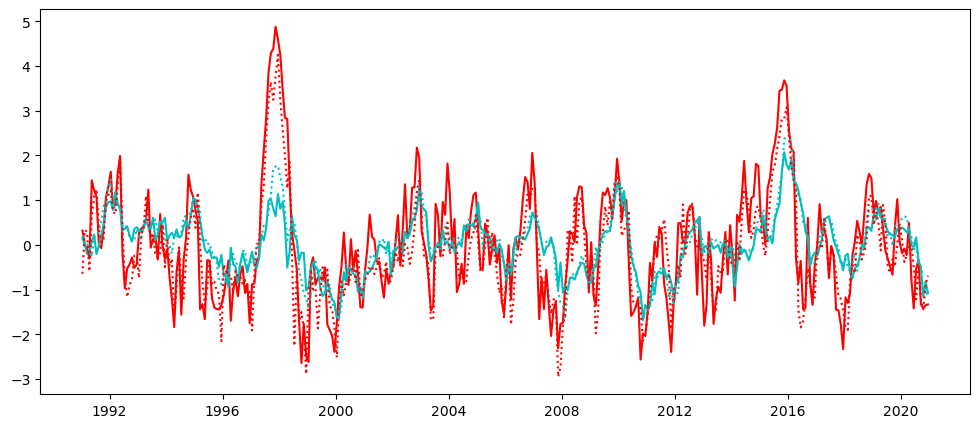

In [47]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(otime,fanom.sst_an_dt.sel(Y=0,X=250,method='nearest'),'r-')
ax.plot(otime,fanom.sst_an_dt.sel(Y=-5,X=200,method='nearest'),'c-')
ax.plot(otime,fanommod.anom.isel(Y=85,X=200).mean(dim='M'),'c:')
ax.plot(otime,fanommod.anom.isel(Y=90,X=250).mean(dim='M'),'r:')

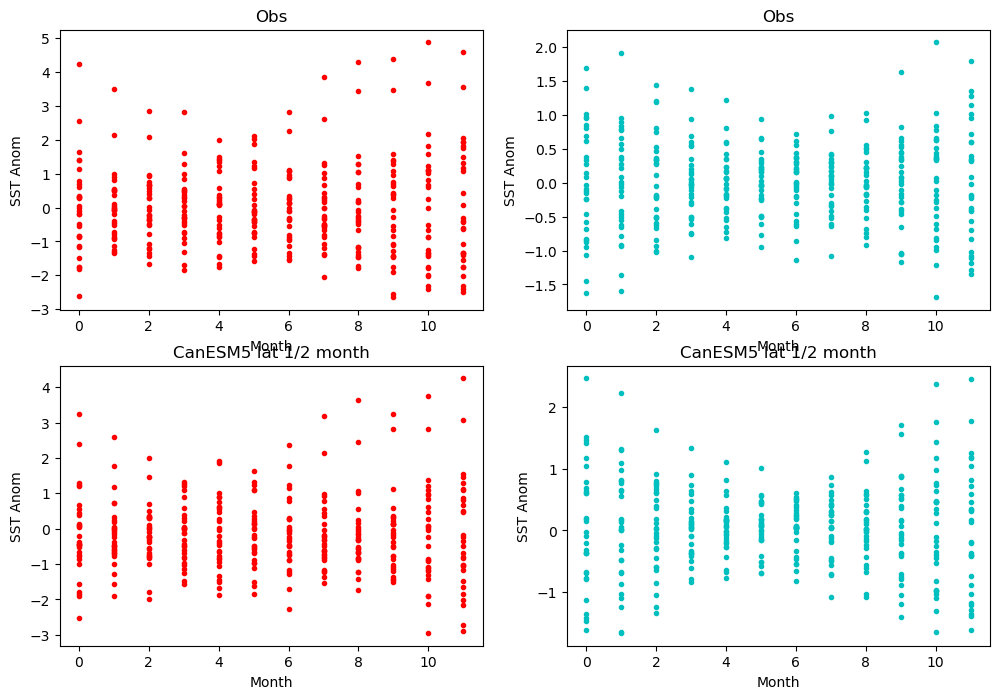

In [57]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
ax[0,0].plot(np.arange(0,len(otime))%12,fanom.sst_an_dt.sel(Y=0,X=250,method='nearest'),'r.')
ax[0,0].set_title('Obs')
ax[0,1].plot(np.arange(0,len(otime))%12,fanom.sst_an_dt.sel(Y=-5,X=200,method='nearest'),'c.')
ax[0,1].set_title('Obs')
ax[1,0].plot(np.arange(0,len(otime))%12,fanommod.anom.isel(Y=90,X=250).mean(dim='M'),'r.')
ax[1,0].set_title('CanESM5 lat 1/2 month')
ax[1,1].plot(np.arange(0,len(otime))%12,fanommod.anom.isel(Y=85,X=200).mean(dim='M'),'c.')
ax[1,1].set_title('CanESM5 lat 1/2 month')
for iax in ax.flatten():
    iax.set_xlabel('Month')
    iax.set_ylabel('SST Anom')

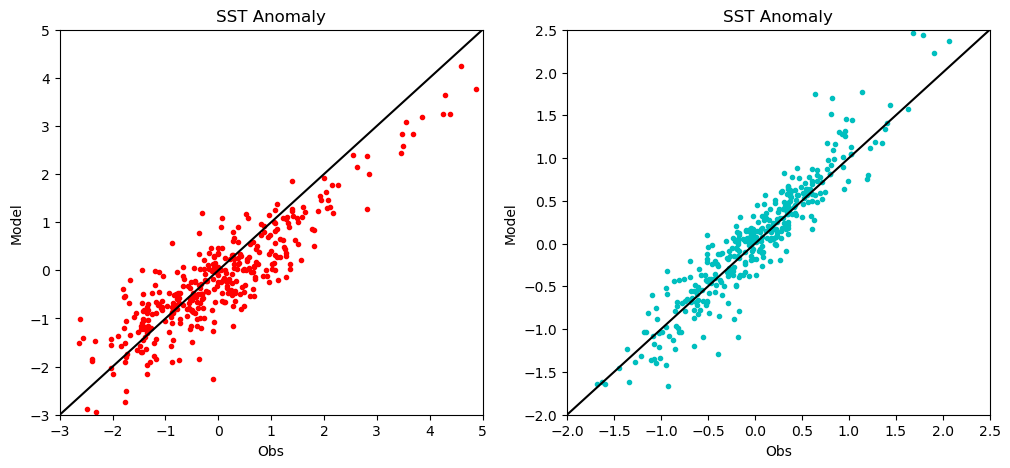

In [64]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(fanom.sst_an_dt.sel(Y=0,X=250,method='nearest'),fanommod.anom.isel(Y=90,X=250).mean(dim='M'),'r.')
ax[1].plot(fanom.sst_an_dt.sel(Y=-5,X=200,method='nearest'),fanommod.anom.isel(Y=85,X=200).mean(dim='M'),'c.')
ax[0].plot([-3,5],[-3,5],'k-')
ax[0].set_xlim(-3,5)
ax[0].set_ylim(-3,5)
ax[1].plot([-2,3],[-2,3],'k-')
ax[1].set_xlim(-2,2.5)
ax[1].set_ylim(-2,2.5)
for iax in ax:
    iax.set_xlabel('Obs')
    iax.set_ylabel('Model')
    iax.set_title('SST Anomaly')